In [1]:
from pybedtools import BedTool
import pybedtools
import pandas as pd
import numpy as np
import dask.dataframe as dd
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")

pybedtools.set_tempdir("/storage/home/nmc6088/scratch")
pybedtools.helpers.set_bedtools_path("/storage/group/izg5139/default/nicole/miniconda3/bin")

df_centro = pd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/centromeres/chm13v2.0_censat_v2.0.bed", 
                          usecols=range(4), 
                          skiprows=1, 
                          header=None, 
                          names=["seqID", "start", "end", "compartment"]
                         )
df_centro.loc[:, "compartment"] = df_centro["compartment"].str.split("_", expand=True)[0]

chrSizes = dd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/chrSizes/chromosome_prim*.txt").compute()
chrSizes.loc[:, "#assembly_accession"] = chrSizes["#assembly_accession"].apply(lambda y: '.'.join(y.split('.')[:2]))

chromosomes = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0']\
                .drop(columns=["#assembly_accession"])

df_centro = df_centro.merge(chromosomes, how="left", left_on="seqID", right_on="chromosome")

/tmp/ipykernel_1352029/3373844391.py:5: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use a new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

To disable this warning in the future, set dask config:

    # via Python
    >>> dask.config.set({'dataframe.query-planning-warning': False})

    # via CLI
    dask config set dataframe.query-p

In [2]:
df_centro = pd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/centromeres/chm13v2.0_censat_v2.0.bed", 
                          usecols=range(4), 
                          skiprows=1, 
                          header=None, 
                          names=["seqID", "start", "end", "compartment"]
                         )
df_centro.loc[:, "compartment"] = df_centro["compartment"].str.split("_", expand=True)[0]

chrSizes = dd.read_table("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/primates/chrSizes/chromosome_prim*.txt").compute()
chrSizes.loc[:, "#assembly_accession"] = chrSizes["#assembly_accession"].apply(lambda y: '.'.join(y.split('.')[:2]))

chromosomes = chrSizes[chrSizes['#assembly_accession'] == 'chm13v2.0']\
                .drop(columns=["#assembly_accession"])

df_centro = df_centro.merge(chromosomes, how="left", left_on="seqID", right_on="chromosome")

In [12]:
df_centro

,seqID,start,end,compartment,chromosome,chrLen
0,chr1,116796047,121405145,ct,chr1,248387328
1,chr1,121405145,121406286,censat,chr1,248387328
2,chr1,121406286,121619169,ct,chr1,248387328
3,chr1,121619169,121625213,hor,chr1,248387328
4,chr1,121625213,121667941,hor,chr1,248387328
...,...,...,...,...,...,...
2518,chrY,62025776,62037362,censat,chrY,62460029
2519,chrY,62052955,62059882,censat,chrY,62460029
2520,chrY,62061431,62072743,hsat3,chrY,62460029
2521,chrY,62072743,62087298,bsat,chrY,62460029


In [43]:
chromosomes =  {
                1: 'NC_060925.1',
                2: 'NC_060926.1',	
                3: 'NC_060927.1',
                4: 'NC_060928.1',
                5: 'NC_060929.1',
                6: 'NC_060930.1',
                7: 'NC_060931.1',
                8: 'NC_060932.1',
                9: 'NC_060933.1',	
                10: 'NC_060934.1',	
                11: 'NC_060935.1',	
                12: 'NC_060936.1',		
                13: 'NC_060937.1',	
                14: 'NC_060938.1',
                15: 'NC_060939.1',		
                16: 'NC_060940.1',		
                17: 'NC_060941.1',	
                18: 'NC_060942.1',	
                19: 'NC_060943.1',	
                20: 'NC_060944.1',	
                21: 'NC_060945.1',	
                22: 'NC_060946.1',	
                'X': 'NC_060947.1',
                'Y': 'NC_060948.1'
}
chromosomes = {v: f'chr{k}' for k, v in chromosomes.items()}

human_gff = pd.read_table("/storage/group/izg5139/default/external/satellites/primates/gff/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz",
                          comment="#",
                          header=None,
                          names=["seqID", "source", "compartment", "start", "end", "score", "strand", "phase", "attributes"],
                         )
human_gff = human_gff[human_gff["compartment"].isin({"gene", 
                                                     "silencer", "CDS", "exon", "enhancer", "region"})].reset_index(drop=True)
human_gff = human_gff[["seqID", "start", "end", "compartment"]]
human_gff.loc[:, "seqID"] = human_gff["seqID"].apply(lambda y: chromosomes[y])
human_gff


,seqID,start,end,compartment
0,chr1,1,248387328,region
1,chr1,7506,138480,gene
2,chr1,138321,138480,exon
3,chr1,129906,130010,exon
4,chr1,109651,109660,exon
...,...,...,...,...
3985072,chrY,62448758,62448826,CDS
3985073,chrY,62448967,62449100,CDS
3985074,chrY,62451557,62451910,exon
3985075,chrY,62451063,62451171,exon


In [44]:
from tqdm import tqdm
compartments = ["region", "gene", "silencer", "CDS", "exon", "enhancer"]

merged_gff = []
for compartment in tqdm(compartments):
    limited_gff = BedTool.from_dataframe(human_gff[human_gff["compartment"] == compartment]).sort().merge(c=["4", "4"], o=["count", "distinct"])
    limited_gff = pd.read_table(limited_gff.fn, header=None, names=["seqID", "start", "end", "totalCompartments", "compartment"])
    # limited_gff.loc[:, "compartment"] = compartment
    merged_gff.append(limited_gff)

merged_gff = pd.concat(merged_gff, axis=0)
merged_gff["compartment"] = merged_gff["compartment"].apply(lambda x: x.capitalize() if x != "CDS" else x)\
                                                .replace("Region", "Genome")
merged_gff

100%|██████████| 6/6 [00:11<00:00,  1.96s/it]


,seqID,start,end,totalCompartments,compartment
0,chr1,1,248387328,1,Genome
1,chr10,1,134758134,1,Genome
2,chr11,1,135127769,1,Genome
3,chr12,1,133324548,1,Genome
4,chr13,1,113566686,1,Genome
...,...,...,...,...,...
98831,chrY,62080839,62081381,1,Enhancer
98832,chrY,62082583,62083084,1,Enhancer
98833,chrY,62086109,62086608,1,Enhancer
98834,chrY,62332804,62333355,1,Enhancer


In [45]:
df_compartments = pd.concat([merged_gff, 
                             df_centro.drop(columns=['chromosome'])], 
                            axis=0)\
                        .drop(columns=['totalCompartments', 'chrLen'])

df_compartments

,seqID,start,end,compartment
0,chr1,1,248387328,Genome
1,chr10,1,134758134,Genome
2,chr11,1,135127769,Genome
3,chr12,1,133324548,Genome
4,chr13,1,113566686,Genome
...,...,...,...,...
2518,chrY,62025776,62037362,censat
2519,chrY,62052955,62059882,censat
2520,chrY,62061431,62072743,hsat3
2521,chrY,62072743,62087298,bsat


In [46]:
satellite_compartments = list(df_compartments['compartment'].unique())
satellite_compartments

['Genome',
 'Gene',
 'Silencer',
 'CDS',
 'Exon',
 'Enhancer',
 'ct',
 'censat',
 'hor',
 'dhor',
 'hsat2',
 'hsat3',
 'gsat',
 'bsat',
 'mon',
 'hsat1A',
 'hsat1B',
 'rDNA']

In [59]:
homo = [f for f in Path("/storage/group/izg5139/default/DNA-Avoidmers/patterns_new/pattern_extractions_square").glob("*.txt") if ("chm" in f.name and "shuffled" not in f.name)]
len(homo)

20

In [122]:
df = pd.read_csv("/storage/group/izg5139/default/DNA-Avoidmers/patterns_new/pattern_extractions_square/chm13v2.0_square_words_length_2_seq_chr7.txt",
                 header=None,
            names=["seqID", "start", "end", "sequence", "length", "type"])
# df_bed = BedTool.from_dataframe(df[["seqID", "start", "end"]]).sort().merge()
# df_merged = pd.read_table(df_bed.fn, header=None, names=["seqID", "start", "end"])
# df_merged

In [123]:
df_maximal = df.groupby(["seqID", "end", "sequence", "length", "type"], as_index=False).agg({"start": "min"})
df_maximal

,seqID,end,sequence,length,type,start
0,chr7,4,cta,3,square,1
1,chr7,4,ta,2,square,2
2,chr7,6,ac,2,square,4
3,chr7,10,cta,3,square,7
4,chr7,10,ta,2,square,8
...,...,...,...,...,...,...
112352143,chr7,160567420,gt,2,square,160567418
112352144,chr7,160567423,ag,2,square,160567421
112352145,chr7,160567423,tag,3,square,160567420
112352146,chr7,160567426,gt,2,square,160567424


In [124]:
df_maximal['length'].max()

45

In [134]:
df_bed = BedTool.from_dataframe(df_maximal[df_maximal["length"] >= 15][["seqID", "start", "end"]]).sort().merge()

In [135]:
df_centro_bed = BedTool.from_dataframe(df_compartments.query("seqID == 'chr7'")[["seqID", "start", "end", "compartment"]])

In [136]:
coverage_df = pd.read_table(
                df_centro_bed.coverage(df_bed).fn,
                header=None,
                names=["seqID", "start", "end", "compartment", "totalHits", "overlappingBp", "compartmentLength", "coverage"]
)
coverage_df.loc[:, "coverage"] = 1e2 * coverage_df["coverage"]
coverage_df

,seqID,start,end,compartment,totalHits,overlappingBp,compartmentLength,coverage
0,chr7,1,160567428,Genome,81473,1362336,160567427,0.84845
1,chr7,13833,59296,Gene,31,520,45463,1.14379
2,chr7,68886,70349,Gene,1,16,1463,1.09364
3,chr7,72477,137227,Gene,72,1202,64750,1.85637
4,chr7,170646,195910,Gene,15,246,25264,0.97372
...,...,...,...,...,...,...,...,...
33848,chr7,66091336,66697029,ct,296,4877,605693,0.80519
33849,chr7,66697029,66699515,mon,1,16,2486,0.64360
33850,chr7,66699515,66708003,hsat2,0,0,8488,0.00000
33851,chr7,66708003,66709007,hsat3,0,0,1004,0.00000


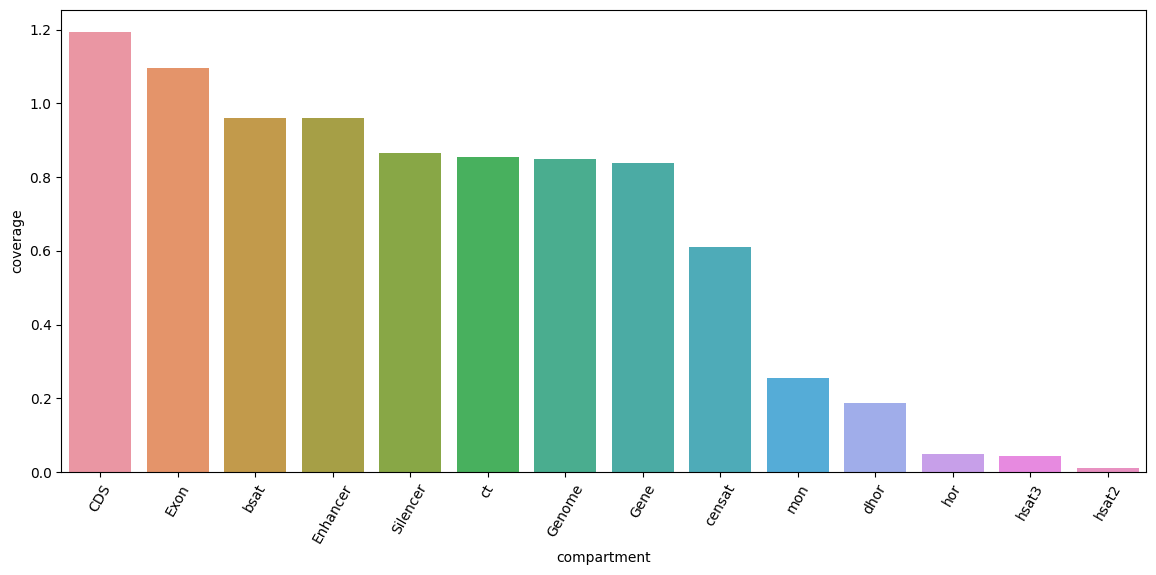

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)

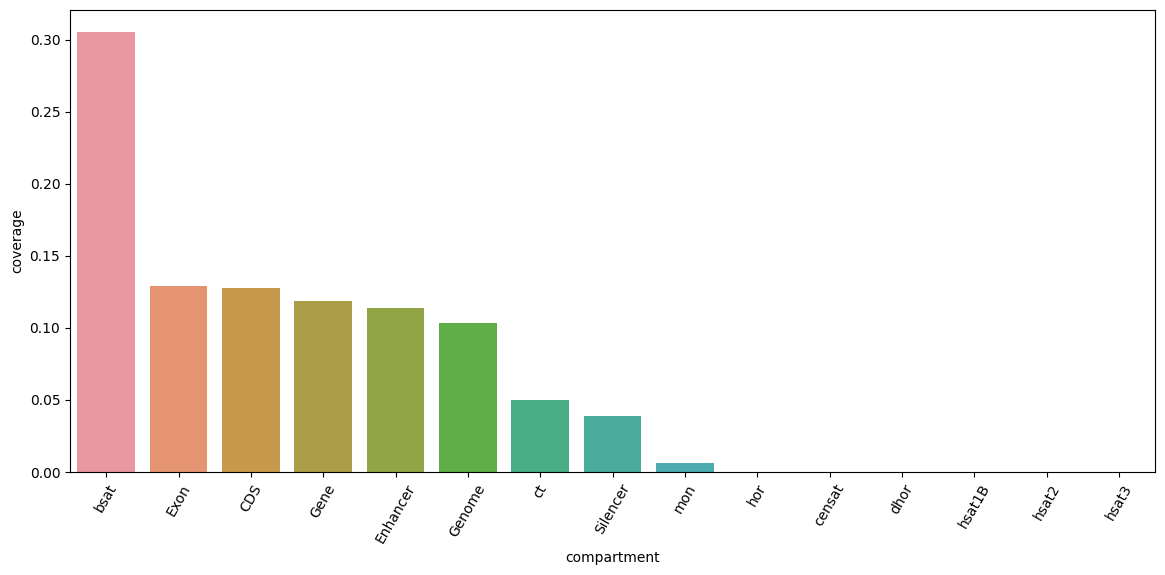

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)

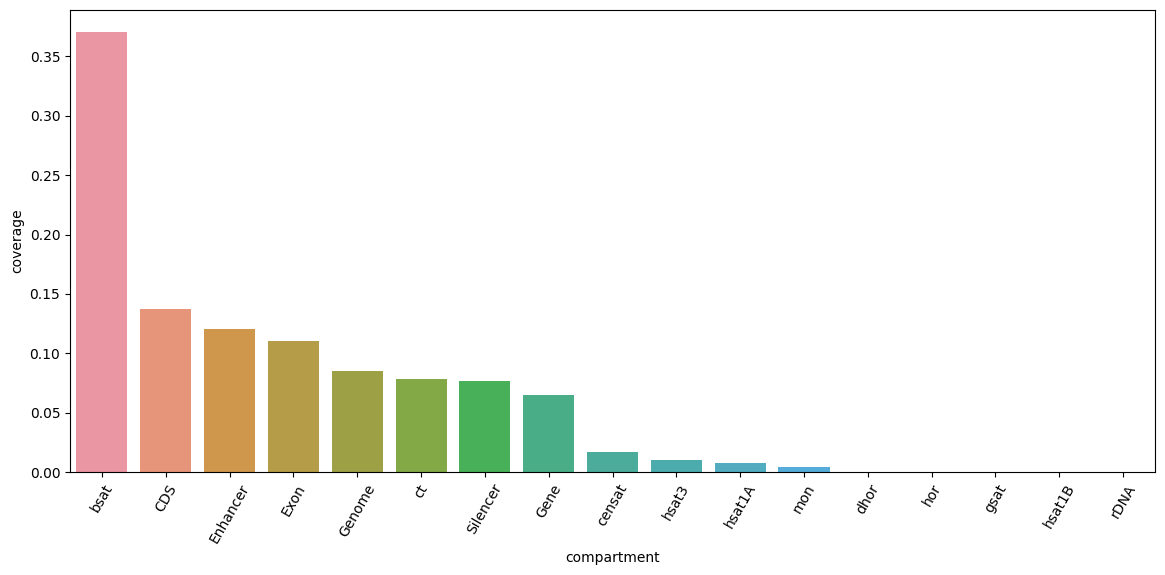

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)

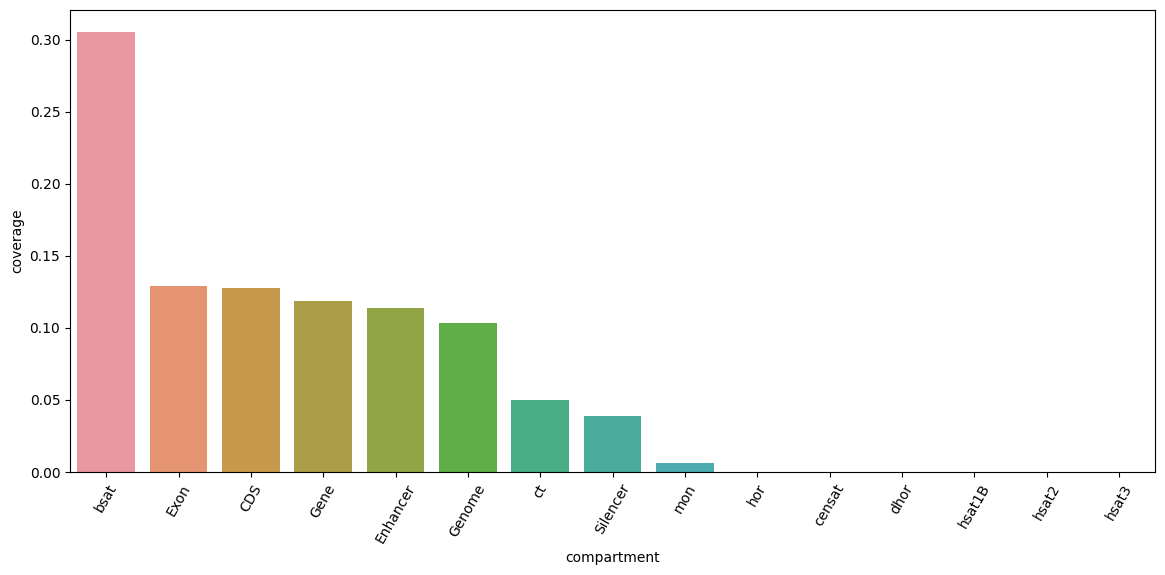

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)

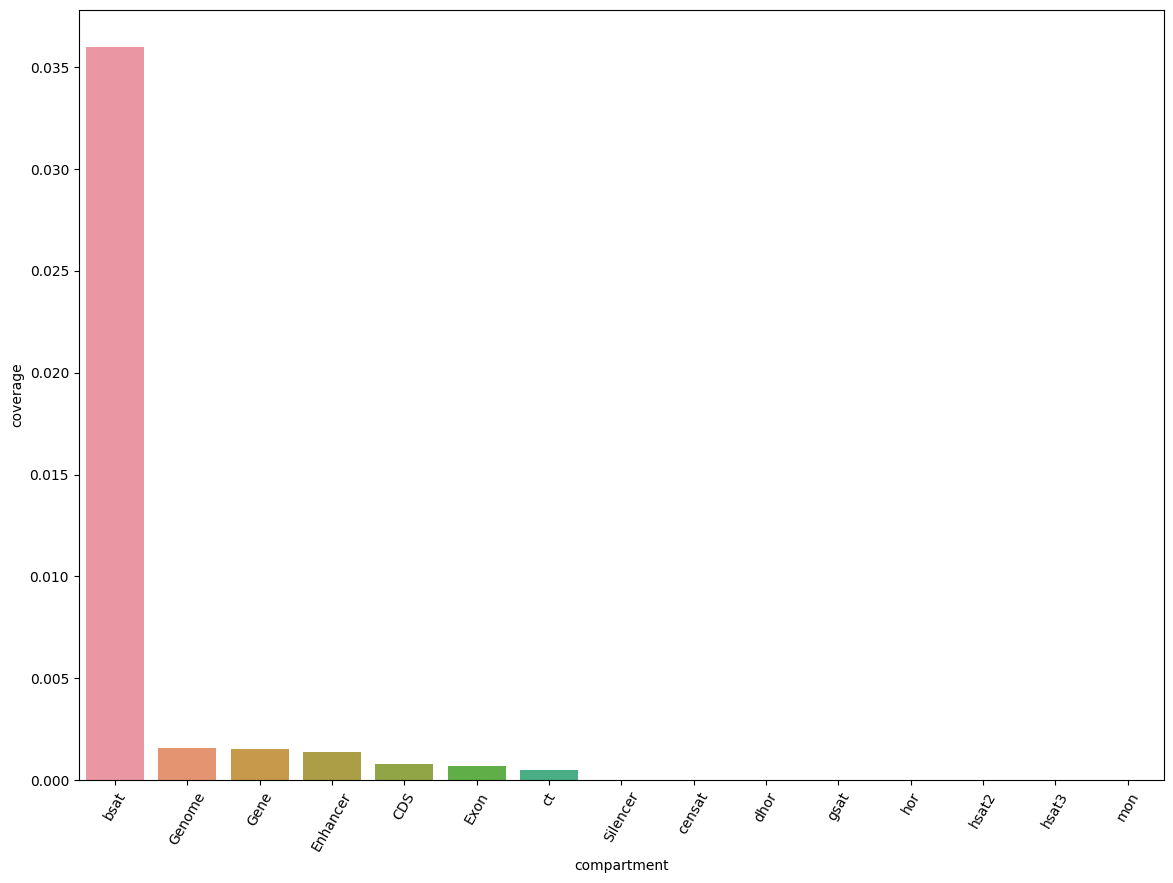

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)

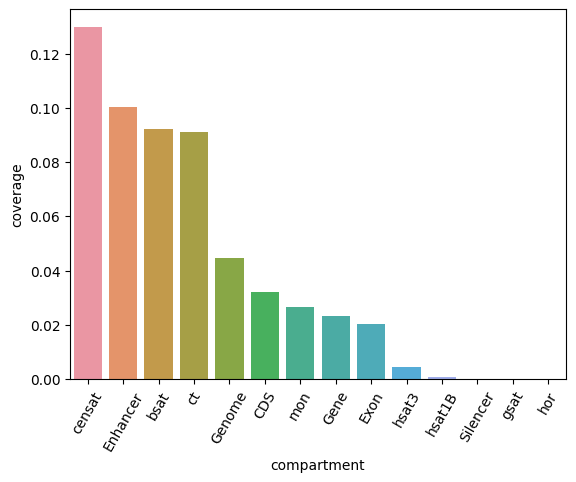

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

cov_df = coverage_df.groupby("compartment").agg({"coverage": "mean"}).sort_values(by=['coverage'], ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
sns.barplot(data=cov_df, x=cov_df.index, y="coverage", ax=ax)
ax.tick_params(axis="x", rotation=60)